# PANEL
##  Input arguments:
>* `img_stack` : input data to be evaluated
### Varargin:
>* pixelSize  |  pixel size in micron {default: 0.0325}<p>
>* boundaryintensity  | background intensity (0~255 range, 8bit) {default: 5}<p>
>* skip  |  skip size to accelerate the rFRC calculation {default: 1}<p>
## Output arguments:
>* `rFRC map` :  Rolling FRC map evaluated<p>
>* `Full PANEL` : PANEL map evaluated<p>
>* `metrics` : [minimum resolution, maximum resolution, mean resolution, rFRC value] <p>

In [1]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PANEL import *
from fSNR.fSNRmap import *
from Utils.shifted_jet import sjet_colorbar

# read data

In [2]:
file = 'HDSMLM_20nmpixel_background_15.tif'
stack = tifffile.imread(file)

# PANEL mapping

In [3]:
args_bg_15 = get_PANEL_options(("--pixelsize=20 --boundaryintensity=15").split())
[map_bg_15, PANELs_bg_15, absolute_value_bg_15] = PANEL(stack, args_bg_15)

PANEL estimation start...
High-resolution fSNR estimation...
Global metrics:

rFRC value: 0.8285570764487151 

mean resolution: 78.01843758694241 nm

minimum resolution: 42.666668 nm

maximum resolution: 256.0 nm

PANEL estimation done, thank you for your waiting
Total time cost: 0:04:40.140773


## sjet colorbar

In [3]:
sjet_map = sjet_colorbar()

## different boundaryintensity

In [4]:
args_bg_5 = get_PANEL_options(("--pixelsize=20 --boundaryintensity=5").split())
args_bg_10 = get_PANEL_options(("--pixelsize=20 --boundaryintensity=10").split())
args_bg_15 = get_PANEL_options(("--pixelsize=20 --boundaryintensity=15").split())
args_bg_20 = get_PANEL_options(("--pixelsize=20 --boundaryintensity=20").split())
map_bg_5 = fSNRmap(stack, args_bg_5)
map_bg_10 = fSNRmap(stack, args_bg_10)
map_bg_15 = fSNRmap(stack, args_bg_15)
map_bg_20 = fSNRmap(stack, args_bg_20)
map_stack = [map_bg_5, map_bg_10, map_bg_15, map_bg_20]

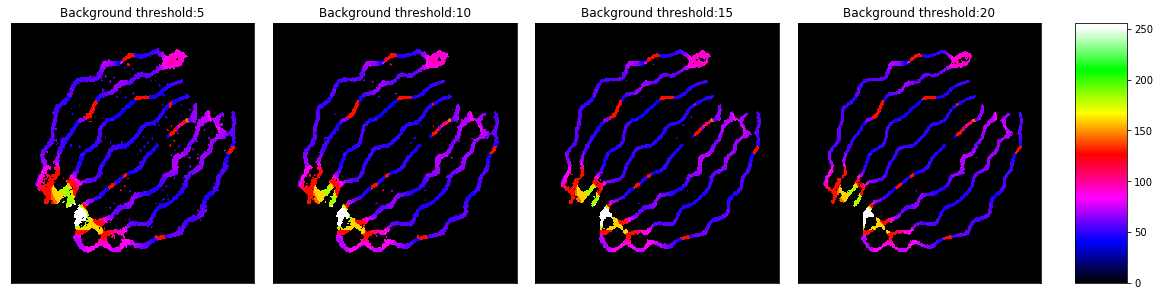

In [6]:
norm = mcolors.Normalize(vmin=0., vmax=256.)
pc_kwargs = {'rasterized': True, 'cmap': sjet_map, 'norm': norm}
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Background threshold:')+('%d'%(5*(flage+1))))
    im = ax.pcolormesh(map_stack[flage][::-1], **pc_kwargs)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs)
plt.show()

## different skip

In [7]:
args_skip_1= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=1").split())
args_skip_2= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=2").split())
args_skip_3= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=3").split())
args_skip_4= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=4").split())
args_skip_6= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=6").split())
args_skip_8= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=8").split())
args_skip_10= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=10").split())
args_skip_12= get_PANEL_options(("--pixelsize=20 --boundaryintensity=15 --skip=12").split())
map_skip_1 = fSNRmap(stack, args_skip_1)
map_skip_2 = fSNRmap(stack, args_skip_2)
map_skip_3 = fSNRmap(stack, args_skip_3)
map_skip_4 = fSNRmap(stack, args_skip_4)
map_skip_6 = fSNRmap(stack, args_skip_6)
map_skip_8 = fSNRmap(stack, args_skip_8)
map_skip_10 = fSNRmap(stack, args_skip_10)
map_skip_12 = fSNRmap(stack, args_skip_12)
map_stack2 = [map_skip_1, map_skip_2, map_skip_3, map_skip_4, map_skip_6, map_skip_8, map_skip_10, map_skip_12]
map_number = [1, 2, 3, 4, 6, 8, 10, 12]

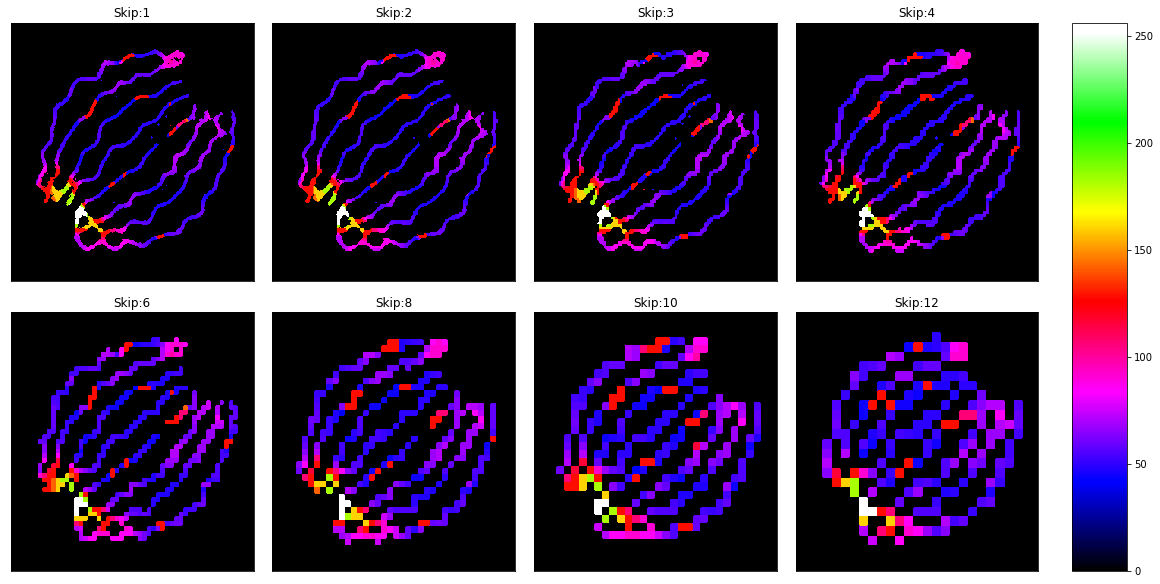

In [8]:
norm = mcolors.Normalize(vmin=0., vmax=256.)
pc_kwargs = {'rasterized': True, 'cmap': sjet_map, 'norm': norm}
fig, axs = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Skip:')+('%d'%(map_number[flage])))
    im = ax.pcolormesh(map_stack2[flage][::-1], **pc_kwargs)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs)
plt.show()